In [75]:
import pickle 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme()
import math
import pandas as pd


In [33]:
output_dir = Path(Path.home(), "Documents/xray/score_bench/out")
fig_file = Path(output_dir, "3ca7/figures/single_resoultion_exp.png")
job_dir = Path(output_dir, "3ca7/single_resolution_exp")

all_rmsds_dict = dict()
all_scores_dict = dict() 

include_native = False
scores_dfs = list() 
native_dfs = list() 
score_files = list(job_dir.glob("scores*"))

for i in range(len(score_files)):
    scores_file = Path(job_dir, "scores_{}.csv".format(i))
    scores_df = pd.read_csv(scores_file)
#     print(scores_df.head())
    
    scores_dfs.append(scores_df.loc[scores_df["native"] == 0])
    native_dfs.append(scores_df.loc[scores_df["native"] == 1])

   Unnamed: 0                                               file  native  \
0           0  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
1           1  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
2           2  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
3           3  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
4           4  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   

         ml          ff           tot      rmsd  
0  5.324464  294.337626  53538.975662  2.047356  
1  5.729396  242.845968  57536.810333  0.979755  
2  5.596398  289.089371  56253.069373  3.426079  
3  5.748569  246.181420  57731.871351  0.861077  
4  5.704996  274.755822  57324.711482  1.269920  
   Unnamed: 0                                               file  native  \
0           0  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
1           1  /home/matthew/xray/decoys/data/decoy_sets/3ca7...       0   
2           2  

In [24]:
if len(scores_dfs)%2 == 1: 
    n_row = len(scores_dfs)//2+1
else: 
    n_row = len(scores_dfs)//2
n_row

2

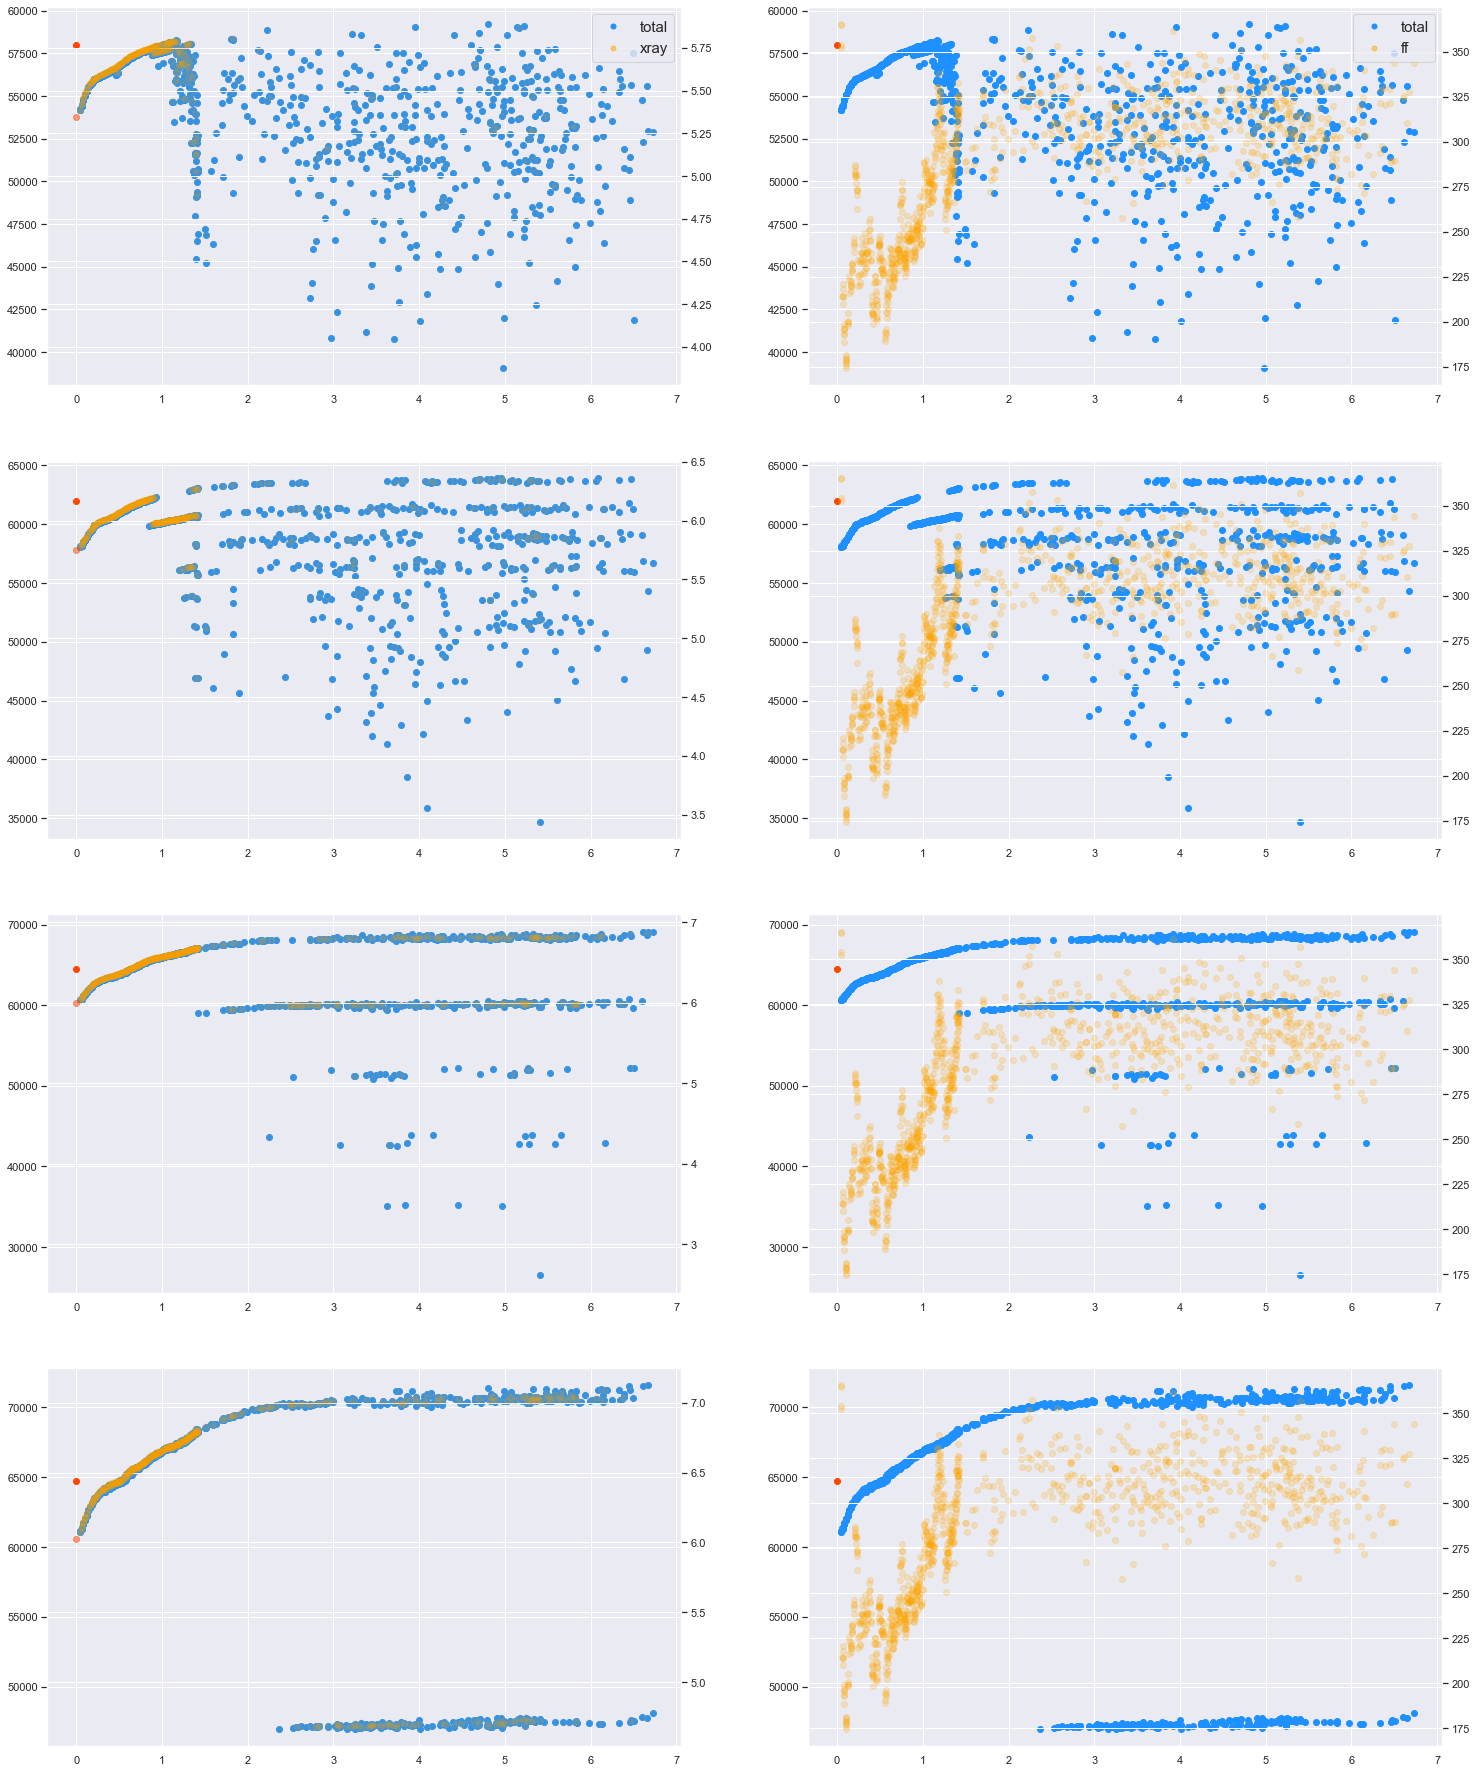

In [111]:
fig, axs = plt.subplots(4, 2, figsize=(25,8*4))

colors = list() 
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha = .1

custom_legend = list() 
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[0], linestyle='None'))
custom_legend.append(Line2D([], [], marker='.', markersize=10, color=colors[1], alpha=.5, linestyle='None'))

for i in range(len(scores_dfs)):
    score_df = scores_dfs[i]
    native_df = native_dfs[i]
     

    ax1 = axs[i][0]
    ax1.scatter(score_df["rmsd"], score_df["tot"], c=colors[0])
    ax1.scatter(native_df["rmsd"], native_df["tot"], c=colors[2])
    
    ax2 = ax1.twinx()
    ax2.scatter(score_df["rmsd"], score_df["ml"], c=colors[1], alpha=alpha)
    ax2.scatter(native_df["rmsd"], native_df["ml"], c=colors[2], alpha=.5)

    if i < 1: 
        plt.legend(custom_legend, ['total', 'xray'], loc="upper right", fontsize=15)
    
    ax3 = axs[i][1]
    ax3.scatter(score_df["rmsd"], score_df["tot"], c=colors[0])
    ax3.scatter(native_df["rmsd"], native_df["tot"], c=colors[2])

    ax4 = ax3.twinx()
    ax4.scatter(score_df["rmsd"], score_df["ff"], c=colors[1], alpha=0.2)
#     ax2.scatter(native_df["rmsd"], native_df["ff"], c="r")
    
    if i < 1: 
        plt.legend(custom_legend, ['total', 'ff'], loc="upper right", fontsize=15)

plt.savefig(fig_file)

